In [11]:
import json

f = open('MMM_1_T.json')
meta_f = open('MMM_Task.meta.json')

data = json.load(f)
meta = json.load(meta_f)

In [12]:
print(meta[0].get('individuals')[0].get('class'))
print(meta[0].get('individuals')[0])
id_names = meta[0].get('individuals')

JaMilch
{'id': '_pI9DAGyIUGSpUuDn8rEHQ', 'class': 'JaMilch'}


In [13]:
# print(id_names)

In [63]:
#Understand data

print(data[1].keys())
print(data[1].get('individuals')[0].get('loc').get('x'))
print(data[1].get('individuals')[0].get('id'))
for i in range(10):
    print(data[i].get('timestamp'))

print(data[701].get('timestamp'))

dict_keys(['_id', 'timestamp', 'individuals', 'skel_individuals'])
18.715347290039062
pnI0taXMNkmQF9ubfBHuvA
0
0.4202408194541931
0.4328928291797638
0.6037880182266235
0.7503911256790161
0.8443101048469543
0.9052920937538147
0.927829921245575
0.9453690052032471
0.9635868072509766
16.547719955444336


In [15]:
#map each id to an int index

idx_of_individuals = {}
idx_to_name = {}
idx = 0
for t in range(len(data)):
    for i in range(len(data[t].get('individuals'))):
        ind_id = data[t].get('individuals')[i].get('id')
        if (not(ind_id in idx_of_individuals)):
            ind_id = data[t].get('individuals')[i].get('id')
            idx_of_individuals[ind_id] = idx
            for j in range(len(id_names)):
                if id_names[j].get('id') == ind_id:
                    idx_to_name[idx] = id_names[j].get('class')
            idx = idx+1
print(len(idx_of_individuals))

251


In [16]:
# save each individuals pos over time in a numpy array

import numpy as np
locs = np.empty((len(idx_of_individuals), len(data), 3))

for i in range(len(data[0].get('individuals'))):
    for t in range(len(data)):
        idx = idx_of_individuals[data[t].get('individuals')[i].get('id')]
        locs[idx,t,0] = data[t].get('individuals')[i].get('loc').get('x')
        locs[idx,t,1] = data[t].get('individuals')[i].get('loc').get('y')
        locs[idx,t,2] = data[t].get('individuals')[i].get('loc').get('z')

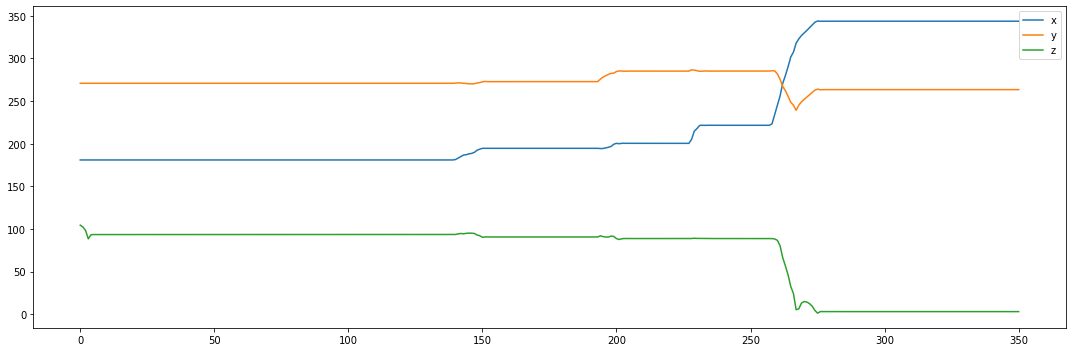

<ipython-input-66-c11477ee513c>:30: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


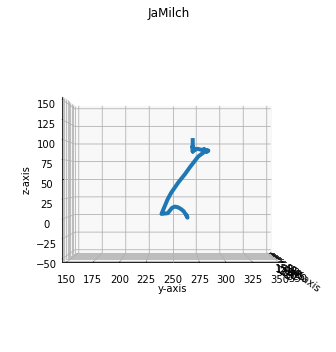

In [66]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True

plot_data = locs[139,::2]

plot_time(plot_data)

steps = plot_data.shape[0]

fig, ax = plt.subplots()
marker_size = 50

def animate(i):
    fig.clear()
    ax = plt.axes(projection='3d')
    ax.set_xlim(150, 350)
    ax.set_ylim(150, 350)
    ax.set_zlim(-50, 150)
    ax.view_init(0, 0)
    ax.set_title("JaMilch")
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    s = ax.plot3D(plot_data[:i,0], plot_data[:i,1], plot_data[:i,2], linewidth=4)

plt.grid(b=None)

# writervideo = animation.FFMpegWriter(fps=60) 
# ani.save('animation.mp4', writer=writervideo)

ani = animation.FuncAnimation(fig, animate, interval=50, frames=range(steps))

ani.save('animation.gif', writer='pillow')

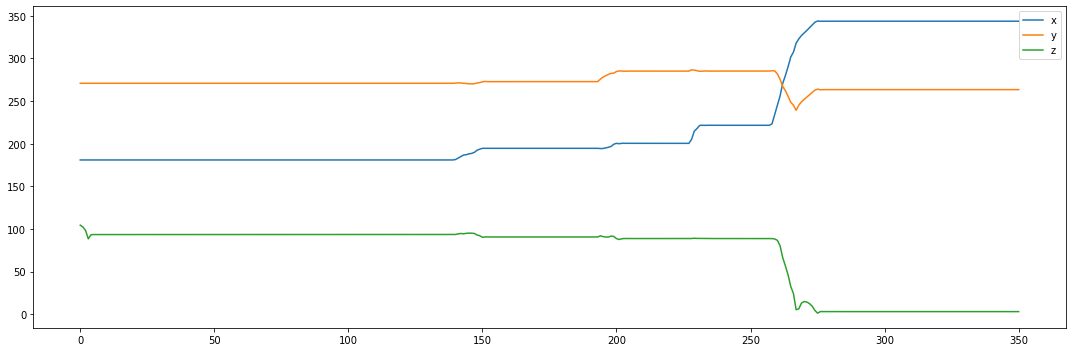

<ipython-input-70-623119f100b3>:30: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


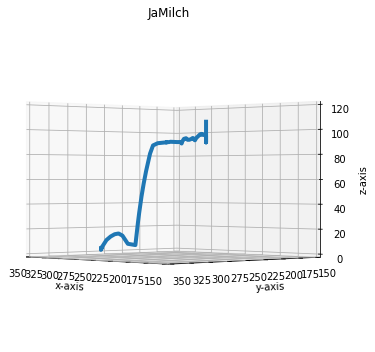

In [70]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True

plot_data = locs[139,::2]

plot_time(plot_data)

steps = plot_data.shape[0]

fig, ax = plt.subplots()
marker_size = 50

def animate(i):
    fig.clear()
    ax = plt.axes(projection='3d')
    ax.set_xlim(150, 350)
    ax.set_ylim(150, 350)
    ax.set_zlim(0, 120)
    ax.view_init(0, 20+i/3)
    ax.set_title("JaMilch")
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    s = ax.plot3D(plot_data[:i,0], plot_data[:i,1], plot_data[:i,2], linewidth=4)

plt.grid(b=None)

# writervideo = animation.FFMpegWriter(fps=60) 
# ani.save('animation.mp4', writer=writervideo)

ani = animation.FuncAnimation(fig, animate, interval=50, frames=range(steps))

ani.save('animation.gif', writer='pillow')

In [17]:
# plot 3 axis of position over time

import matplotlib.pyplot as plt
def plot_time(individual=np.zeros((len(data), 3)), title=""):
    plt.rcParams['figure.figsize'] = [15, 5]
    plt.plot(individual[:,0])
    plt.plot(individual[:,1])
    plt.plot(individual[:,2])
    plt.legend(('x', 'y', 'z'))
    plt.title(title)
    plt.show()

In [18]:
# find out which individuals actually move at all

moving_individuals = []

for i in range(locs.shape[0]):
    start_loc = locs[i,0]
    for t in range(locs.shape[1]):
        if any(locs[i,t]!=start_loc):
            moving_individuals.append(i)
            break
            
print(len(moving_individuals))

93


702


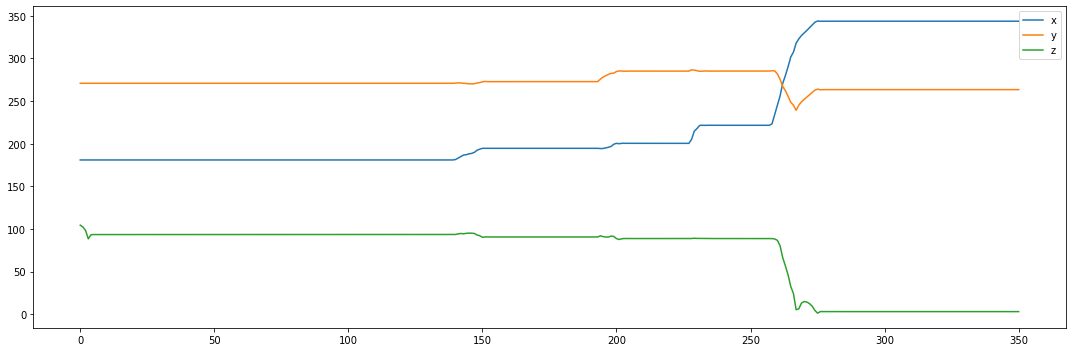

In [22]:
print(locs.shape[1])
plot_time(locs[139,0::2])

In [ ]:
# plot some individuals to get an overview

for i in range(0, len(idx_of_individuals), 10): # Nur jedes zehnte individual wird betrachtet
    if (i in moving_individuals):
        print(i)
        plot_time(locs[i,20:250:2])

In [ ]:
plot_time(locs[11,20:250:2])

In [ ]:
plt.axis([0, 10, 0, 1])

for i in range(locs.shape[1]):
    plt.scatter(i, locs[139,i,0])
    plt.pause(0.05)

plt.show()

In [ ]:
# interactive 3D plotting

%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

fst_idx = 139
# scd_idx = 200

print("first plotted individual: ", idx_to_name[fst_idx])
# print("id of second plotted individual: ",  idx_to_name[scd_idx])

loc1 = locs[fst_idx,5::2]
# loc2 = locs[scd_idx,5:100:2]

plot = ax.plot(loc1[:,0], loc1[:,1], loc1[:,2])
# plot = ax.plot(loc2[:,0], loc2[:,1], loc2[:,2])
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [20]:
print(idx_to_name)

{0: 'IAIWindowTypeA', 1: 'IAIWindowTypeC', 2: 'IAIWindowTypeA', 3: 'IAIWindowTypeA', 4: 'IAIWindowTypeA', 5: 'IAIWindowTypeA', 6: 'IAIWindowTypeB', 7: 'IAIWindowTypeB', 8: 'IAIDoorA', 9: 'IAIDoorB', 10: 'IAILabFloor', 11: 'IAIDoorC', 12: 'IAIWindowTypeC', 13: 'IAIWindowTypeA', 14: 'IAILabWalls', 15: 'IAIPosterFrameA0', 16: 'IAIPosterFrameA0', 17: 'ACATFrame', 18: 'IAIPosterFrameA0', 19: 'IAIAnteroomLight', 20: 'IAIAnteroomLight', 21: 'IAIAnteroomLight', 22: 'IAIAnteroomLight', 23: 'IAIAnteroomLight', 24: 'IAICeilingVentArrayLong', 25: 'IAICeilingVentLight', 26: 'IAICeilingVentLight', 27: 'IAICeilingVentArrayShort', 28: 'IAIDoorD', 29: 'IAIDoorFrameA', 30: 'IAIDoorFrameB', 31: 'IAIDoorFrameC', 32: 'IAIPosterA0EASE', 33: 'IAIPosterA0RoboHow', 34: 'Acat', 35: 'IAIPosterA0Sherpa', 36: 'IAIIslandArea', 37: 'IAIOvenArea', 38: 'IAIFridgeArea', 39: 'IAISinkArea', 40: 'IAIOvenCase', 41: 'IAIDishwasherCase', 42: 'IAIFridgeCasing', 43: 'IAICooktop', 44: 'IAISink', 45: 'IAIOvenKnob', 46: 'IAIOvenK